## Car Evaluation을 Deep Learning으로 바꾸기

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras

columns_name = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 
                'safety', 'class']

data = pd.read_csv('/Users/minjeong/Downloads/car+evaluation/car.data', header=None, names=columns_name)
data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


## 데이터 타입, 결측값, 컬럼 확인

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [5]:
data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

## 인코딩

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in data.columns:
    data[i]=le.fit_transform(data[i])

data

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


## Splitting the data into training and test

In [7]:
X = data.iloc[:,0:6].values
y = data.iloc[:, 6].values

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y).values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, 
                                                    random_state=0)

In [8]:
X

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       ...,
       [1, 1, 3, 2, 0, 1],
       [1, 1, 3, 2, 0, 2],
       [1, 1, 3, 2, 0, 0]])

In [9]:
Y

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]], dtype=uint8)

In [10]:
X.shape, Y.shape

((1728, 6), (1728, 4))

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(6,input_shape=(6,),activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='sigmoid'))

model.compile(Adam(lr=0.02),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 4)                 28        
                                                                 
Total params: 154 (616.00 Byte)
Trainable params: 154 (616.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
44/44 [==============================] - 0s 3ms/step - loss: 1.5417 - accuracy: 0.0535 - val_loss: 1.4192 - val_accuracy: 0.1474
Epoch 2/100
44/44 [==============================] - 0s 962us/step - loss: 1.3616 - accuracy: 0.2200 - val_loss: 1.3206 - val_accuracy: 0.3786
Epoch 3/100
44/44 [==============================] - 0s 910us/step - loss: 1.2824 - accuracy: 0.5080 - val_loss: 1.2519 - val_accuracy: 0.6098
Epoch 4/100
44/44 [==============================] - 0s 908us/step - loss: 1.2143 - accuracy: 0.6795 - val_loss: 1.1804 - val_accuracy: 0.6908
Epoch 5/100
44/44 [==============================] - 0s 905us/step - loss: 1.1327 - accuracy: 0.6968 - val_loss: 1.0830 - val_accuracy: 0.6936
Epoch 6/100
44/44 [==============================] - 0s 925us/step - loss: 0.9870 - accuracy: 0.7019 - val_loss: 0.9096 - val_accuracy: 0.6936
Epoch 7/100
44/44 [==============================] - 0s 900us/step - loss: 0.8527 - accuracy: 0.7019 - val_loss: 0.8423 - val_accuracy: 0.6936
E

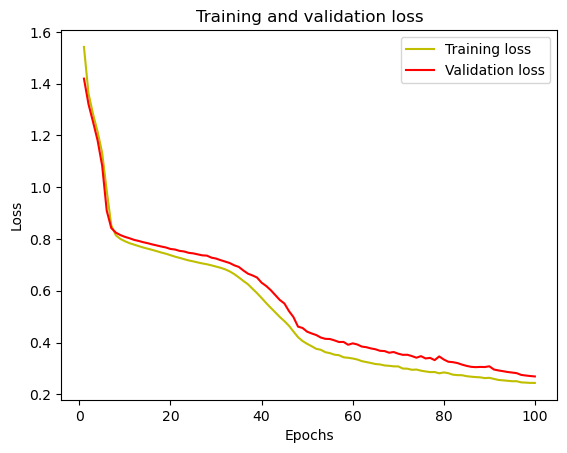

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

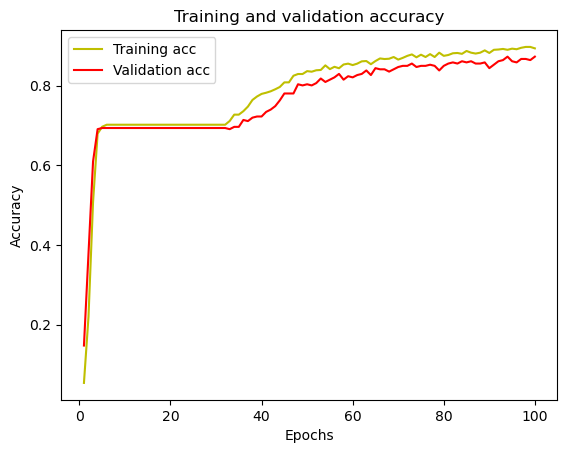

In [14]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.69      0.81      0.74        79
           1       1.00      0.18      0.30        17
           2       0.95      0.96      0.95       240
           3       0.62      0.50      0.56        10

    accuracy                           0.87       346
   macro avg       0.82      0.61      0.64       346
weighted avg       0.88      0.87      0.86       346

[[ 64   0  12   3]
 [ 14   3   0   0]
 [ 10   0 230   0]
 [  5   0   0   5]]
